In [2]:
# wave 곡선을 예측해 보자.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

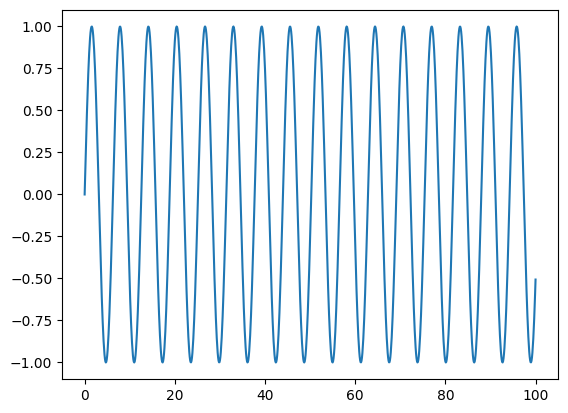

In [3]:
x = np.linspace(0, 100, 1001)
x = np.round(x,1) # 소수점 첫째 자리 기준으로 반올림 추후에 학습시 문제 발생
y = np.sin(x)
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x, columns = ["sine_wave"])

In [ ]:
# Train, Test 분리
train = df.iloc[:801]
test = df.iloc[801:]

In [ ]:
train.tail()

,sine_wave
79.6,-0.872445
79.7,-0.916876
79.8,-0.952146
79.9,-0.977903
80.0,-0.993889


In [ ]:
test.head()

,sine_wave
80.1,-0.999944
80.2,-0.996008
80.3,-0.982120
80.4,-0.958419
80.5,-0.925142


In [ ]:
test.tail()

,sine_wave
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924
100.0,-0.506366


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
arr_1 = np.array([1,2,3,4,5])
generator = TimeseriesGenerator(arr_1, arr_1, length =2, batch_size = 1)
generator[0], generator[1], generator[2]

# length 개 만큼의 숫자를 통해 뒤의 1 개를 예측
# -> 800~1000, length=50 의 경우 generator[0]=앞의 50개(800~849)를 통해 850번째 데이터를 예측

((array([[1, 2]]), array([3])),
 (array([[2, 3]]), array([4])),
 (array([[3, 4]]), array([5])))

In [ ]:
length = 50
train_1 = np.array(train).reshape(801,)
generator = TimeseriesGenerator(train_1, train_1, length =length, batch_size = 1)
# train data를 이용해서 target data가 train 인 data를 생성한다. 

In [ ]:
generator[0][0].shape

(1, 50)

In [ ]:
generator[1][0]

array([[ 0.09983342,  0.19866933,  0.29552021,  0.38941834,  0.47942554,
         0.56464247,  0.64421769,  0.71735609,  0.78332691,  0.84147098,
         0.89120736,  0.93203909,  0.96355819,  0.98544973,  0.99749499,
         0.9995736 ,  0.99166481,  0.97384763,  0.94630009,  0.90929743,
         0.86320937,  0.8084964 ,  0.74570521,  0.67546318,  0.59847214,
         0.51550137,  0.42737988,  0.33498815,  0.23924933,  0.14112001,
         0.04158066, -0.05837414, -0.15774569, -0.2555411 , -0.35078323,
        -0.44252044, -0.52983614, -0.61185789, -0.68776616, -0.7568025 ,
        -0.81827711, -0.87157577, -0.91616594, -0.95160207, -0.97753012,
        -0.993691  , -0.99992326, -0.99616461, -0.98245261, -0.95892427]])

In [ ]:
import tensorflow as tf
# https://www.tensorflow.org/guide/keras/rnn?hl=ko
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, activation="tanh", input_shape=(50,1)))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss = "mse")

In [ ]:
model.fit(generator, epochs=5)

Epoch 1/5
751/751 [==============================] - 7s 8ms/step - loss: 0.0052
Epoch 2/5
751/751 [==============================] - 6s 8ms/step - loss: 2.7577e-05
Epoch 3/5
751/751 [==============================] - 6s 8ms/step - loss: 6.1349e-04
Epoch 4/5
751/751 [==============================] - 8s 11ms/step - loss: 2.2595e-04
Epoch 5/5
751/751 [==============================] - 6s 8ms/step - loss: 1.2952e-04


In [ ]:
# predict 
length = 50
test_1 = np.array(test).reshape(200,)
generator_test = TimeseriesGenerator(test_1, test_1, length =length, batch_size = 1)

In [ ]:
generator_test[0], generator_test[149], 

((array([[-0.99994369, -0.99600761, -0.98211976, -0.95841889, -0.92514181,
          -0.88262103, -0.83128139, -0.77163586, -0.70428039, -0.62988799,
          -0.54920196, -0.46302849, -0.37222858, -0.27770949, -0.18041562,
          -0.0813191 ,  0.01858994,  0.11831323,  0.21685437,  0.31322878,
           0.40647351,  0.49565689,  0.57988783,  0.65832473,  0.73018386,
           0.79474723,  0.85136976,  0.89948568,  0.93861423,  0.96836446,
           0.98843911,  0.99863761,  0.99885805,  0.98909823,  0.96945567,
           0.94012663,  0.90140415,  0.85367514,  0.79741649,  0.73319032,
           0.66163835,  0.58347552,  0.49948278,  0.41049938,  0.31741441,
           0.22115794,  0.12269172,  0.02299962, -0.07692229, -0.17607562]]),
  array([-0.27346966])),
 (array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
           0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
           0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.8356813

In [ ]:
predict_test = model.predict(generator_test)

150/150 [==============================] - 1s 3ms/step


In [ ]:
predict_test.shape

(150, 1)

In [ ]:
test

array([-0.99994369, -0.99600761, -0.98211976, -0.95841889, -0.92514181,
       -0.88262103, -0.83128139, -0.77163586, -0.70428039, -0.62988799,
       -0.54920196, -0.46302849, -0.37222858, -0.27770949, -0.18041562,
       -0.0813191 ,  0.01858994,  0.11831323,  0.21685437,  0.31322878,
        0.40647351,  0.49565689,  0.57988783,  0.65832473,  0.73018386,
        0.79474723,  0.85136976,  0.89948568,  0.93861423,  0.96836446,
        0.98843911,  0.99863761,  0.99885805,  0.98909823,  0.96945567,
        0.94012663,  0.90140415,  0.85367514,  0.79741649,  0.73319032,
        0.66163835,  0.58347552,  0.49948278,  0.41049938,  0.31741441,
        0.22115794,  0.12269172,  0.02299962, -0.07692229, -0.17607562,
       -0.27346966, -0.36813128, -0.45911465, -0.54551071, -0.6264562 ,
       -0.70114234, -0.76882291, -0.82882165, -0.88053907, -0.92345845,
       -0.95715093, -0.98127987, -0.99560419, -0.99998077, -0.99436586,
       -0.97881558, -0.9534853 , -0.91862811, -0.87459229, -0.82

In [ ]:
test_2 = test.drop(test.index[0:length])

In [ ]:
test_2["predict_test_simplernn"] = predict_test

In [ ]:
test_2

,sine_wave,predict_test_simplernn
85.1,-0.273470,-0.279713
85.2,-0.368131,-0.373903
85.3,-0.459115,-0.464401
85.4,-0.545511,-0.550227
85.5,-0.626456,-0.630472
...,...,...
99.6,-0.802196,-0.801203
99.7,-0.738582,-0.737492
99.8,-0.667588,-0.666050
99.9,-0.589924,-0.587504


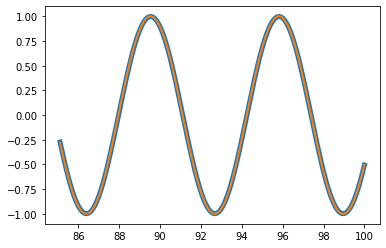

In [ ]:
plt.plot(test_2.index, test_2.sine_wave, linewidth = 5.0) # true 
plt.plot(test_2.index, test_2.predict_test_simplernn, linewidth = 2.0)# predict

In [ ]:
# 1. sin 말고 cos 
# 2. test case 를 85 ~ 100 -> 100.1 ~ 150??? 
# 100.0 예측 : 95.0 ~ 99.9 -> 100.0
# 100.1 예측 : 95.1 ~ 100.0 -> 100.1 (# 100.0 을 append 해주자 )
# 100.2 예측 : 95.2 ~ 100.1 -> 100.2 (# 100.1 을 append 해주자 )
# ...
# 105.0 예측 : 100.0 ~ 104.9 -> 105.0 (# 문제발생.... 원래 데이터로 예측한 데이터가 아니다. ) 

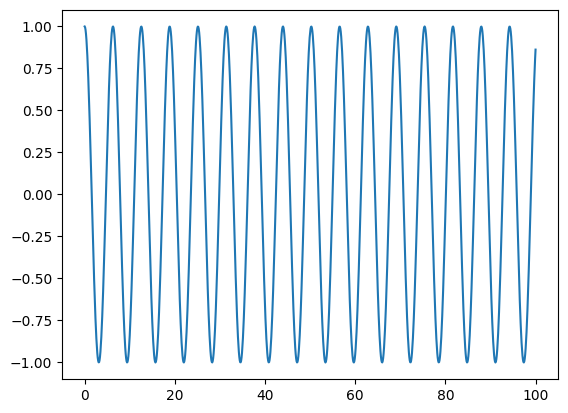

In [4]:
x=np.linspace(0,100,1000) # 0~100 까지의 공간에 1000개의 샘플 생성
x=np.round(x,1) #소수 첫째자리 기준으로 반올림
y=np.cos(x)

plt.plot(x,y)

In [5]:
df=pd.DataFrame(data=y, index=x,columns=['cos_wave'])

In [6]:
# Train, test 분리
length= len(y)
print(length)
train = df.iloc[:int(len(y)*0.8)] # 0~799  int(len(y)*0.8)=800
test = df.iloc[int(len(y)*0.8):] # 800~999

1000


In [28]:
print(len(train),len(test))

800 200


In [29]:
train.tail()

,cos_wave
79.6,-0.488712
79.7,-0.399171
79.8,-0.305642
79.9,-0.209059
80.0,-0.110387


In [30]:
test.tail()

,cos_wave
99.6,0.597060
99.7,0.674163
99.8,0.744531
99.9,0.807459
100.0,0.862319


In [7]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2023-01-05 20:23:15.761063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:23:16.649992: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64:
2023-01-05 20:23:16.652672: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/l

In [8]:
train_2=np.array(train).reshape(800,)
generator = TimeseriesGenerator(train_2, train_2, length = 50, batch_size = 1) # x=train_2, y=train_2

In [33]:
generator[0][0].shape

(1, 50)

In [50]:
generator[0]

(array([[ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
          0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
          0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
          0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
         -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
         -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
         -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
         -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
         -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
         -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237]]),
 array([0.28366219]))

In [9]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, activation='tanh', input_shape=(50,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
model.fit(generator, epochs=5)

Epoch 1/5


2023-01-05 20:23:25.300024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-05 20:23:25.321021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-05 20:23:25.321067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-05 20:23:25.321682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

750/750 [==============================] - 32s 40ms/step - loss: 0.0047
Epoch 2/5
750/750 [==============================] - 32s 42ms/step - loss: 2.4415e-04
Epoch 3/5
750/750 [==============================] - 32s 42ms/step - loss: 1.1347e-04
Epoch 4/5
750/750 [==============================] - 32s 42ms/step - loss: 1.7555e-04
Epoch 5/5
750/750 [==============================] - 32s 43ms/step - loss: 1.7125e-04


In [10]:
# predict
test_2 = np.array(test).reshape(200,)  # test의 크기만큼 입력을 위해 고침.
generator_test = TimeseriesGenerator(test_2, test_2, length = 50, batch_size = 1)

In [37]:
generator_test[0], generator_test[149]

((array([[-0.01061247,  0.08926835,  0.18825722,  0.28536509,  0.37962168,
           0.47008522,  0.55585183,  0.63606455,  0.70992192,  0.77668598,
           0.83568966,  0.8863434 ,  0.92814109,  0.9606651 ,  0.98359046,
           0.99668812,  0.99982719,  0.99297632,  0.97620396,  0.9496777 ,
           0.91366257,  0.86851842,  0.81469632,  0.75273405,  0.68325071,
           0.60694055,  0.52456605,  0.43695025,  0.34496859,  0.24954012,
           0.15161832,  0.05218161, -0.04777649, -0.14725721, -0.2452666 ,
          -0.34082536, -0.4329787 , -0.52080587, -0.60342932, -0.6800235 ,
          -0.74982311, -0.81213073, -0.86632381, -0.91186088, -0.94828693,
          -0.97523801, -0.99244483, -0.99973547, -0.99703709, -0.98437664]]),
  array([-0.96188063])),
 (array([[ 0.73017356,  0.65831338,  0.57987556,  0.4956438 ,  0.40645974,
           0.31321447,  0.21683966,  0.11829826,  0.01857487, -0.08133412,
          -0.18043045, -0.27772397, -0.37224257, -0.46304185, -0.5492145

In [11]:
predict_test = model.predict(generator_test)

150/150 [==============================] - 2s 14ms/step


In [39]:
predict_test.shape # 150개임.

(150, 1)

In [12]:
test_3 = test.drop(test.index[0:50])  # test data 는 800~ 1000 인데 predict_test는 150개의 데이터만 있으므로 50개를 쳐내줌.

In [13]:
test_3

,cos_wave
85.1,-0.961881
85.2,-0.929774
85.3,-0.888377
85.4,-0.838104
85.5,-0.779457
...,...
99.6,0.597060
99.7,0.674163
99.8,0.744531
99.9,0.807459


In [14]:
test_3["predict_test_simpleRNN"] = predict_test

In [15]:
test_3

,cos_wave,predict_test_simpleRNN
85.1,-0.961881,-0.952763
85.2,-0.929774,-0.921508
85.3,-0.888377,-0.880480
85.4,-0.838104,-0.831562
85.5,-0.779457,-0.774243
...,...,...
99.6,0.597060,0.598452
99.7,0.674163,0.676231
99.8,0.744531,0.747471
99.9,0.807459,0.811117


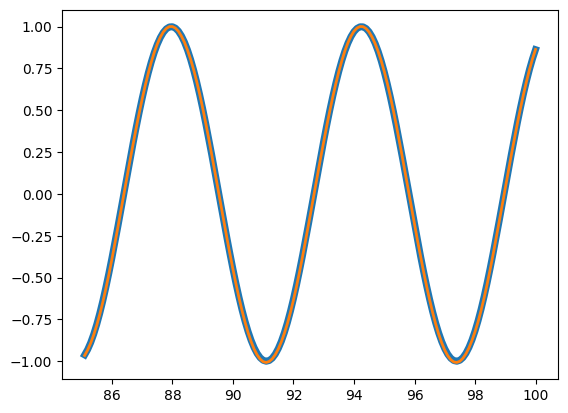

In [49]:
plt.plot(test_3.index, test_3.cos_wave, linewidth = 5.0) # true 
plt.plot(test_3.index, test_3.predict_test_simpleRNN, linewidth = 2.0)# predict

In [61]:
np.mean(tf.keras.losses.mean_squared_error(test_3.cos_wave, test_3.predict_test_simpleRNN)) # 1* (0.1)*5

1.9920011e-05

In [ ]:
# 여기까지가 naive forecasting 

In [60]:
# x의 100 이 넘어가는 수 예측

# predict
## test_2 = np.array(test).reshape(200,)
## generator_test = TimeseriesGenerator(test_2, test_2, length = 50, batch_size = 1)
## predict_test = model.predict(generator_test)
## test_3 = test.drop(test.index[0:50])
## train = df.iloc[:801] test = df.iloc[801:]

### 해결법. 950~1000 까지의 데이터를 사용하여 1001 예측. 예측 완료한 데이터를 데이터프레임에 포함하여 951~1001까지의 데이터를 사용하여 1002 예측.

"""
test_2 = np.array(test).reshape(200,)  # test의 크기만큼 입력을 위해 고침.
generator_test = TimeseriesGenerator(test_2, test_2, length = 50, batch_size = 1)
predict_test = model.predict(generator_test)
"""

150

In [16]:

dx = test_2 #800~1000
estimate = [dx[-1]]

for i in range(10):
    # 마지막 50개만큼의 데이터를 입력값으로 사용
    px = dx[-50:].reshape(1, 50, 1) # length=50
    # 다음 값을 예측
    yHat=model.predict(px)[0][0]
    # 예측값을 저장
    estimate.append(yHat)
    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장 삽입
    dx = np.insert(dx, len(dx), yHat) # dx 라는 array 에 dx[len(dx)] 에 yHat값을 추가


1/1 [==============================] - 0s 16ms/step


In [92]:
type(estimate)

list

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 80.1 to 100.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cos_wave  200 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [22]:
testfinal=test_3

In [21]:
estimate

,predict_test_simpleRNN
101,0.862319
102,0.911259
103,0.948761
104,0.976492
105,0.993740
106,1.000337
107,0.996033
108,0.980849
109,0.955527
110,0.919674


In [19]:
estimate=pd.Series(estimate,index=[101,102,103,104,105,106,107,108,109,110,111])

In [20]:
estimate=pd.DataFrame(estimate, columns=['predict_test_simpleRNN'])

In [23]:
pd.concat([testfinal,estimate])

,cos_wave,predict_test_simpleRNN
85.1,-0.961881,-0.952763
85.2,-0.929774,-0.921508
85.3,-0.888377,-0.880480
85.4,-0.838104,-0.831562
85.5,-0.779457,-0.774243
...,...,...
107.0,NaN,0.996033
108.0,NaN,0.980849
109.0,NaN,0.955527
110.0,NaN,0.919674


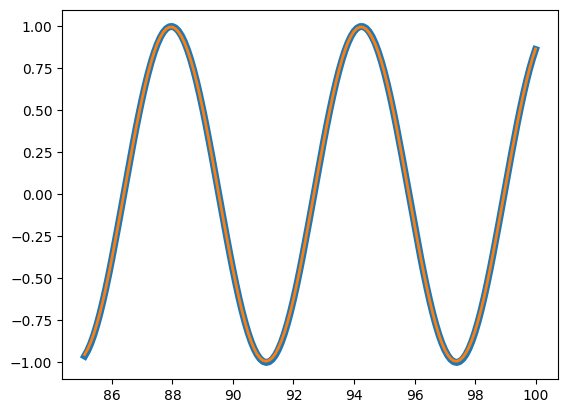

In [25]:
# pd.concat([testfinal,estimate])
plt.plot(testfinal.index, testfinal.cos_wave, linewidth = 5.0) # true 
plt.plot(testfinal.index, testfinal.predict_test_simpleRNN, linewidth = 2.0)# predict